## **Задача 1** ##

### Условие
$$m \frac{d^2x}{dt^2} = -\frac{x}{L}T$$
$$m \frac{d^2y}{dt^2} = -\frac{y}{L}T - F(t)$$
$$x^2 + y^2 = L$$

### Новые переменные

$$
\begin{cases}
    x_1 = x \\
    x_2 = x' = x_1'\\
    x_3 = y \\
    x_4 = y' = x_3' \\
\end{cases}
$$

### Система дифференциальных уравнений первого порядка

$$
\begin{cases}
    x_1' = x_2 \\
    x_2' = - \frac{x_1}{m L} T \\
    x_3' = x_4 \\
    x_4' = - \frac{x_3}{m L} T - \frac{F(t)}{m}
\end{cases}
$$

$$
x_1^2 + x_3^2 = L^2 \to x_1 x_1' + x_3 x_3' = 0 \to (x_1')^2 + (x_3')^2 + x_1 x_1'' + x_3 x_3'' = 0 \\
$$
$$
x_1 x_2' + x_3 x_4' = - [(x_1')^2 + (x_3')^2] = - [x_2^2 + x_4^2] \\
$$
$$
x_1 x_2' + x_3 x_4' = - \frac{L T + y F(t)}{m} \\
$$
$$
x_2^2 + x_4^2 = \frac{L T + y F(t)}{m} \\
$$
$$LT = m (x_2^2 + x_4^2) - yF(t) \\
$$

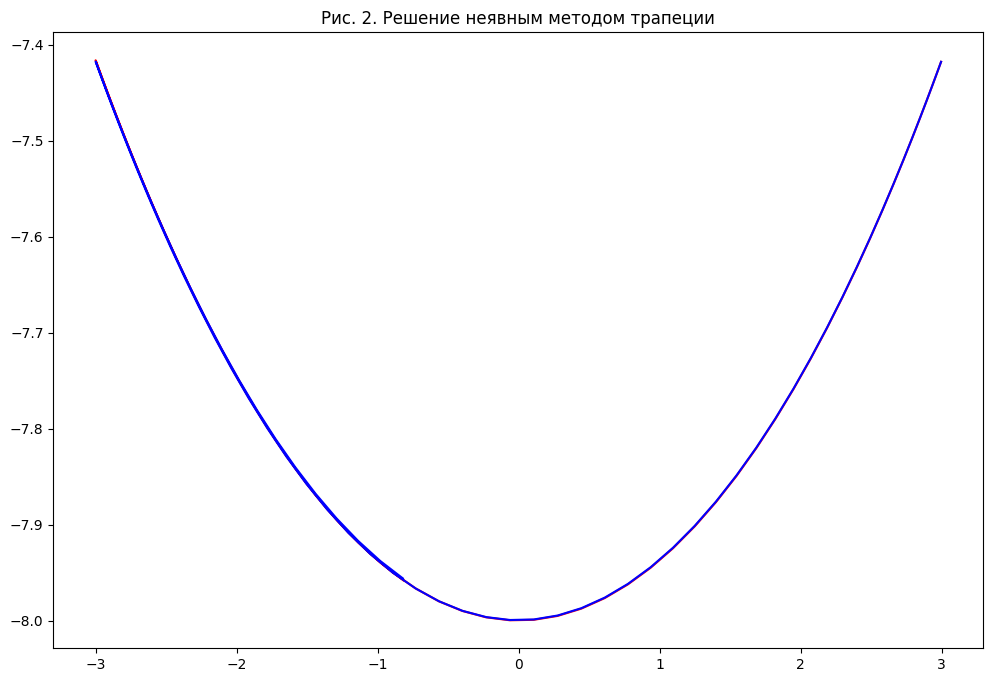

In [4]:
import numpy as np
import matplotlib as mpl
from numpy import float32, float64
import matplotlib.pyplot as plt
import math
import scipy as sp
from scipy.optimize import fsolve

# Глобальные переменные
m = 2.0  # кг
l = 8.0  # м

# Определение функций
def g(t):
    return 9.81 + 0.01 * np.cos(2 * np.pi * t)

def F(t):
    return m * g(t)

def calculateT(xs, t):
    return ((m * (xs[1] ** 2.0 + xs[3] ** 2.0) - xs[2] * F(t)) / l)

def f1(xs, t):
    return xs[1]

def f2(xs, t):
    T = calculateT(xs, t)
    return (-1.0 * (xs[0] / (m * l)) * T)

def f3(xs, t):
    return xs[3]

def f4(xs, t):
    T = calculateT(xs, t)
    return (-1.0 * (xs[2] / (m * l)) * T - (F(t) / m))

def explicitRungeKutta4(fs, xs, t, step):
    k1 = np.array(list(map(lambda func: func(xs, t), fs)))
    k2 = np.array(list(map(lambda func: func(xs + k1 * step / 2.0, t + step / 2.0), fs)))
    k3 = np.array(list(map(lambda func: func(xs + k2 * step / 2.0, t + step / 2.0), fs)))
    k4 = np.array(list(map(lambda func: func(xs + k3 * step, t + step), fs)))
    
    return xs + (step / 6.0) * (k1 + 2.0 * k2 + 2.0 * k3 + k4)

def implicitTrapezoid(fs, xs, t, step):
    f = lambda t, ys: np.array(list(map(lambda func: func(ys, t), fs)))

    def prevY(ys):
        return (ys - xs - 0.5 * step * (f(t, xs) + f(t + step, ys)))

    ys = fsolve(lambda ys: prevY(ys), xs)
    return ys

# Основное тело
fs = np.array([f1, f2, f3, f4])
xs_0 = np.array([3.0, 0.0, -np.sqrt(55.0), 0.0])
t_end = 4.0

# Решение методом Рунге-Кутты 4
step = 0.05 
t = 0.0  
xs = xs_0 
solution = []

while t <= t_end:
    xs = explicitRungeKutta4(fs, xs, t, step)
    solution.append(xs)
    t += step

x = np.array(list(map(lambda y: y[0], solution)))
y = np.array(list(map(lambda y: y[2], solution)))

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title("Рис. 1. Решение явным методом Рунге-Кутты 4-ого порядка")
ax.plot(x, y, c="r")


# Решение методом трапеции
step = 0.05
t = 0.0  
xs = xs_0
solution = []

while t <= t_end:
    xs = implicitTrapezoid(fs, xs, t, step)
    solution.append(xs)
    t += step

x = np.array(list(map(lambda y: y[0], solution)))
y = np.array(list(map(lambda y: y[2], solution)))

ax.set_title("Рис. 2. Решение неявным методом трапеции")
ax.plot(x, y, c="b")